In [2]:
from IPython.core.display import display
from IPython.core.display import HTML
import IPython.core.display as di

import time
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

import sklearn as skl
from sklearn import svm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
import matplotlib.pyplot as plt
from scipy import interp

//anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Loading the **CreditCard Clients Data**:

In [4]:
#df = pd.read_csv('/home/pascal/Dokumente/Fintegral/CreditCardClients.csv')
df = pd.read_csv(r"/Users/Florazhan/Desktop/Machine Learning/PD/CreditCardClients.csv")

#df = pd.read_csv(r'c:\users\pascal\Desktop\ML\HSBC\CreditCardClients.csv')

Check **correlations** between features:

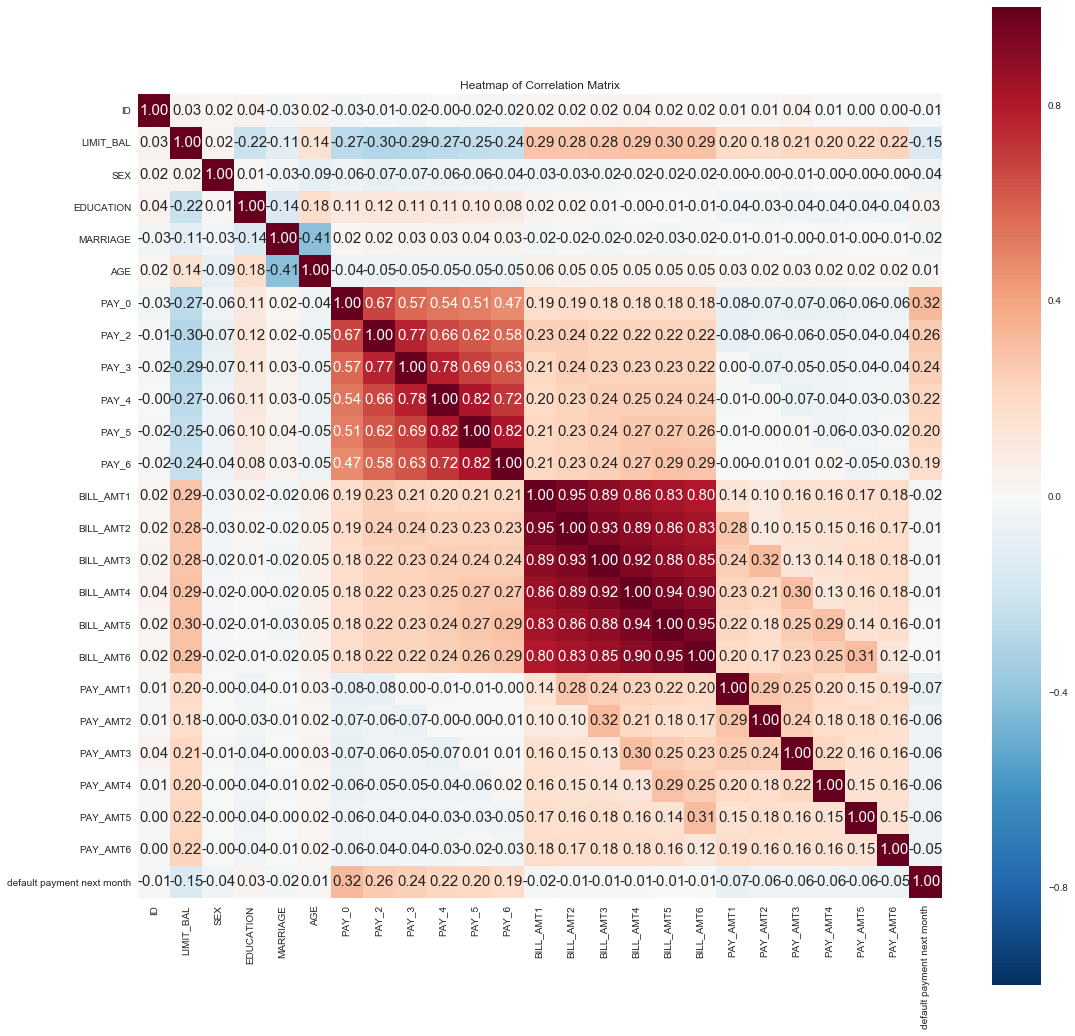

In [5]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

**Add some features**:
    
- Limit utilisation[i] = $\frac{BILL\_ AMT[i]}{LIMIT\_ BAL}[i]$ 

- Payment utilisation[i] = $\frac{PAY\_ AMT[i]}{BILL\_ BAL[i]}$ 

- Due amount = BILL$\_ $BAL[i] - PAY$\_$ AMT[i]

- Due percentage each month = $\frac{BILL\_BAL[i] - PAY\_ AMT[i]}{BILL_BAL[i]}$

- Percentage change in limit utilisation monthly and 5 months

- Percentage change in payment utilisation monthly and 5 months

In [6]:
df['rel_bill_limit1']  = df['BILL_AMT1'] / df['LIMIT_BAL']
df['rel_bill_limit2']  = df['BILL_AMT2'] / df['LIMIT_BAL']
df['rel_bill_limit3']  = df['BILL_AMT3'] / df['LIMIT_BAL']
df['rel_bill_limit4']  = df['BILL_AMT4'] / df['LIMIT_BAL']
df['rel_bill_limit5']  = df['BILL_AMT5'] / df['LIMIT_BAL']
df['rel_bill_limit6']  = df['BILL_AMT6'] / df['LIMIT_BAL']
df['sum_rel_credit_usage'] = df['rel_bill_limit1'] + df['rel_bill_limit2'] + df['rel_bill_limit3'] + df['rel_bill_limit4'] + df['rel_bill_limit5'] + df['rel_bill_limit6']

#df.rel_bill_limit1.fillna(value=0,inplace=True)
#df.rel_bill_limit2.fillna(value=0,inplace=True)
#df.rel_bill_limit3.fillna(value=0,inplace=True)
#df.rel_bill_limit4.fillna(value=0,inplace=True)
#df.rel_bill_limit5.fillna(value=0,inplace=True)
#df.rel_bill_limit6.fillna(value=0,inplace=True)
#df.sum_rel_credit_usage.fillna(value=0,inplace=True)

#Since we get bill this month but pay back next month?? 
#But in the descriptions it says previous payment
#df['rel_pay_bill1']   = df['PAY_AMT2']  / df['BILL_AMT1']
#df['rel_pay_bill2']   = df['PAY_AMT3']  / df['BILL_AMT2']
#df['rel_pay_bill3']   = df['PAY_AMT4']  / df['BILL_AMT3']
#df['rel_pay_bill4']   = df['PAY_AMT5']  / df['BILL_AMT4']
#df['rel_pay_bill5']   = df['PAY_AMT6']  / df['BILL_AMT5']

df['rel_pay_bill1']   = df['PAY_AMT1']  / df['BILL_AMT1']
df['rel_pay_bill2']   = df['PAY_AMT2']  / df['BILL_AMT2']
df['rel_pay_bill3']   = df['PAY_AMT3']  / df['BILL_AMT3']
df['rel_pay_bill4']   = df['PAY_AMT4']  / df['BILL_AMT4']
df['rel_pay_bill5']   = df['PAY_AMT5']  / df['BILL_AMT5']
df['rel_pay_bill6']   = df['PAY_AMT6']  / df['BILL_AMT6']
df['rel_pay_bill_total'] = df['rel_pay_bill1'] + df['rel_pay_bill2'] + df['rel_pay_bill3'] + df['rel_pay_bill4'] + df['rel_pay_bill5'] + df['rel_pay_bill6']

#df.rel_pay_bill1.fillna(value=0,inplace=True)
#df.rel_pay_bill2.fillna(value=0,inplace=True)
#df.rel_pay_bill3.fillna(value=0,inplace=True)
#df.rel_pay_bill4.fillna(value=0,inplace=True)
#df.rel_pay_bill5.fillna(value=0,inplace=True)
#df.rel_pay_bill_total(value=0, inplace=True)

#Due payment each month
df['DUE_1']=df['BILL_AMT1']-df['PAY_AMT1']
df['DUE_2']=df['BILL_AMT2']-df['PAY_AMT2']
df['DUE_3']=df['BILL_AMT3']-df['PAY_AMT3']
df['DUE_4']=df['BILL_AMT4']-df['PAY_AMT4']
df['DUE_5']=df['BILL_AMT5']-df['PAY_AMT5']
df['DUE_6']=df['BILL_AMT6']-df['PAY_AMT6']

#df.DUE_1.fillna(value=0, inplace=True)
#df.DUE_2.fillna(value=0, inplace=True)
#df.DUE_3.fillna(value=0, inplace=True)
#df.DUE_4.fillna(value=0, inplace=True)
#df.DUE_5.fillna(value=0, inplace=True)
#df.DUE_6.fillna(value=0, inplace=True)

#Due percentage
df['DUE_BILL1'] = df['DUE_1'] / df['BILL_AMT1']
df['DUE_BILL2'] = df['DUE_2'] / df['BILL_AMT2']
df['DUE_BILL3'] = df['DUE_3'] / df['BILL_AMT3']
df['DUE_BILL4'] = df['DUE_4'] / df['BILL_AMT4']
df['DUE_BILL5'] = df['DUE_5'] / df['BILL_AMT5']
df['DUE_BILL6'] = df['DUE_6'] / df['BILL_AMT6']

#df.DUE_BILL1.fillna(value=0,inplace=True)
#df.DUE_BILL2.fillna(value=0,inplace=True)
#df.DUE_BILL3.fillna(value=0,inplace=True)
#df.DUE_BILL4.fillna(value=0,inplace=True)
#df.DUE_BILL5.fillna(value=0,inplace=True)

#Change in limit utilisation monthly
df['change_BL_M1'] = (df['rel_bill_limit2'] - df['rel_bill_limit1']) / df['rel_bill_limit1']
df['change_BL_M2'] = (df['rel_bill_limit3'] - df['rel_bill_limit2']) / df['rel_bill_limit2']
df['change_BL_M3'] = (df['rel_bill_limit4'] - df['rel_bill_limit3']) / df['rel_bill_limit3']
df['change_BL_M4'] = (df['rel_bill_limit5'] - df['rel_bill_limit4']) / df['rel_bill_limit4']
df['change_BL_M5'] = (df['rel_bill_limit6'] - df['rel_bill_limit5']) / df['rel_bill_limit5']

#df['change_BL_M1'].fillna(value=0,inplace=True)
#df['change_BL_M2'].fillna(value=0,inplace=True)
#df['change_BL_M3'].fillna(value=0,inplace=True)
#df['change_BL_M4'].fillna(value=0,inplace=True)
#df['change_BL_M5'].fillna(value=0,inplace=True)

#Change in limit utilisation from total 5 months
df['change_BL_5M'] = (df['rel_bill_limit6'] - df['rel_bill_limit1'])/ df['rel_bill_limit1']

#Change in pay utlisation
df['change_PB_M1'] = (df['rel_pay_bill2'] - df['rel_pay_bill1'])/ df['rel_pay_bill1']
df['change_PB_M2'] = (df['rel_pay_bill3'] - df['rel_pay_bill2'])/ df['rel_pay_bill2']
df['change_PB_M3'] = (df['rel_pay_bill4'] - df['rel_pay_bill3'])/ df['rel_pay_bill3']
df['change_PB_M4'] = (df['rel_pay_bill5'] - df['rel_pay_bill4'])/ df['rel_pay_bill4']
df['change_PB_M5'] = (df['rel_pay_bill6'] - df['rel_pay_bill5'])/ df['rel_pay_bill5']

df['changge_PB_5M'] = (df['rel_pay_bill6'] - df['rel_pay_bill1'])/ df['rel_pay_bill1']

#df['change_PB_M1'].fillna(value=0, inplace=True)
#df['change_PB_M2'].fillna(value=0, inplace=True)
#df['change_PB_M3'].fillna(value=0, inplace=True)
#df['change_PB_M4'].fillna(value=0, inplace=True)

print (df.head(5))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

       ...        change_BL_M3  change_BL_M4  change_BL_M5  change_BL_5M  \
0      ...           -1.000000           NaN           NaN     -1.000000   
1      ...            0.219985      0.055929     -0.056151      0.215884   
2      ...            0.056936      0.043054      0.040206     -0.468210   
3      ...           -0.425575      0.022780      0.020305     -0.371207   
4      ...           -0.415655     -0.085673     -0.000783      1.220146   

   change_PB_M1  change_PB_M2  change_PB_M3  change_PB_M4  change_PB

Populating the interactive namespace from numpy and matplotlib


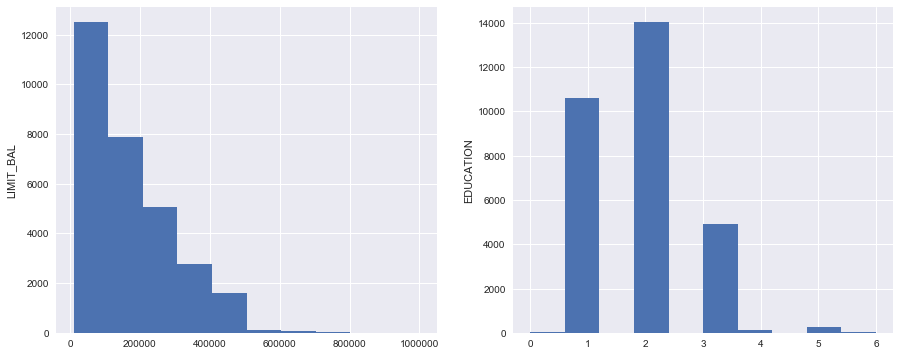

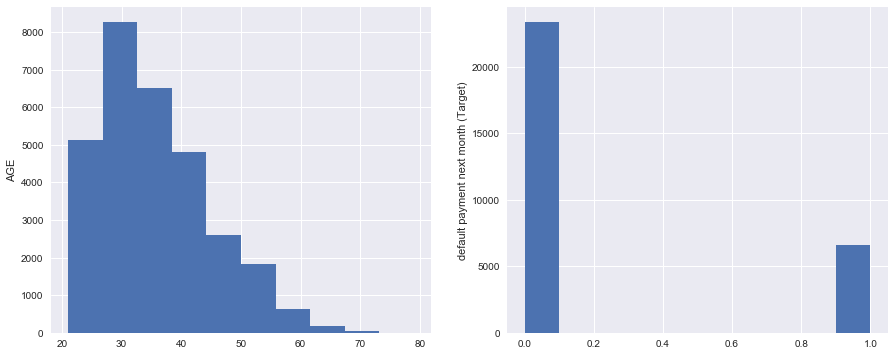

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

subplot(121)
hist(df['LIMIT_BAL'])
plt.ylabel('LIMIT_BAL');  
subplot(122)
hist(df['EDUCATION'])
plt.ylabel('EDUCATION');  
plt.show()

subplot(121)
hist(df['AGE'])
plt.ylabel('AGE');  
subplot(122)
hist(df['default payment next month'])
plt.ylabel('default payment next month (Target)');  
plt.show()



Delete the **raw data**

In [11]:
#rename
df.rename(columns = {'default payment next month':'target'}, inplace=True)

nr_test_samples = 2000
samplesize = 30000

df = df.replace([np.nan, -np.inf, np.inf], -999)

X = df.copy()
X.drop(['ID', 'target'], axis = 1, inplace = True)
X.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
     axis = 1, inplace = True)

print (X.columns)

scaler           = preprocessing.StandardScaler().fit(X);
X_scaled         = scaler.transform(X);


#CAN DO X_train = X.samle(frac = 0.x)
#X_train          = X.iloc[0:nr_train_samples]
#X_test           = X.iloc[nr_train_samples: ]
#df_train         = df.iloc[0:nr_train_samples]
#df_test          = df.iloc[nr_train_samples: ]
#target_train     = df['target'].iloc[0:nr_train_samples].copy()
#target_test      = df['target'].iloc[nr_train_samples: ].copy()

#target           = df['target'].iloc[samplesize:].copy()
#target           = df['target'].iloc[nr_train_samples:].copy()

#scaler           = preprocessing.StandardScaler().fit(X_train);
#X_train_scaled   = scaler.transform(X_train);
#X_test_scaled    = scaler.transform(X_test);

#------------------------------------------------------------------------
X_test          = X.iloc[0:nr_test_samples]
X_train           = X.iloc[nr_test_samples: ]
df_test         = df.iloc[0:nr_test_samples]
df_train          = df.iloc[nr_test_samples: ]
target_test     = df['target'].iloc[0:nr_test_samples].copy()
target_train      = df['target'].iloc[nr_test_samples: ].copy()

target           = df['target'].iloc[samplesize:].copy()
target           = df['target'].iloc[nr_test_samples:].copy()

scaler           = preprocessing.StandardScaler().fit(X_train);
X_train_scaled   = scaler.transform(X_train);
X_test_scaled    = scaler.transform(X_test);


print ('The size of X is {}'.format(X.shape))

# Code for the creation of profile plots
def Profile(x,y,nbins,xmin,xmax):
    df_ = DataFrame({'x' : x , 'y' : y})

    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    
    df_['bin'] = np.digitize(df_['x'],binedges)
    df_['bin'] = df_['bin'].apply(lambda x: x if x <= nbins else nbins)

    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df_['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    
    bins = ProfileFrame.index.values
    
    for bin in bins: #[1,2,3,4,5,...]
        ProfileFrame.ix[bin,'ymean'] = df_.ix[df_['bin']==bin,'y'].mean()
        ProfileFrame.ix[bin,'yStandDev'] = df_.ix[df_['bin']==bin,'y'].std()
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])
    

    errorbar(ProfileFrame['bincenters'].values, ProfileFrame['ymean'].values, yerr=ProfileFrame['yMeanError'].values, xerr=(xmax-xmin)/(2*nbins), fmt=".") 
    return

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'rel_bill_limit1',
       'rel_bill_limit2', 'rel_bill_limit3', 'rel_bill_limit4',
       'rel_bill_limit5', 'rel_bill_limit6', 'sum_rel_credit_usage',
       'rel_pay_bill1', 'rel_pay_bill2', 'rel_pay_bill3', 'rel_pay_bill4',
       'rel_pay_bill5', 'rel_pay_bill6', 'rel_pay_bill_total', 'DUE_1',
       'DUE_2', 'DUE_3', 'DUE_4', 'DUE_5', 'DUE_6', 'DUE_BILL1', 'DUE_BILL2',
       'DUE_BILL3', 'DUE_BILL4', 'DUE_BILL5', 'DUE_BILL6', 'change_BL_M1',
       'change_BL_M2', 'change_BL_M3', 'change_BL_M4', 'change_BL_M5',
       'change_BL_5M', 'change_PB_M1', 'change_PB_M2', 'change_PB_M3',
       'change_PB_M4', 'change_PB_M5', 'changge_PB_5M'],
      dtype='object')
The size of X is (30000, 49)


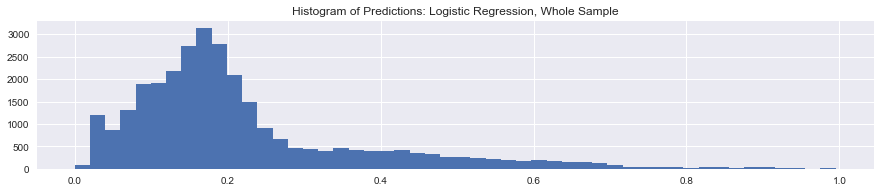

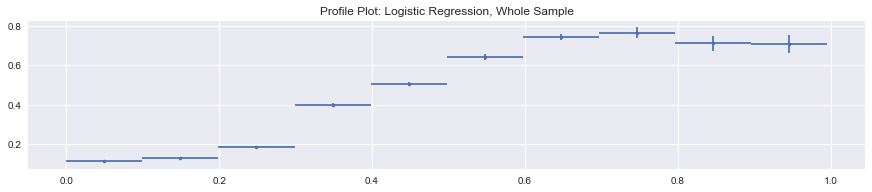

ROC_auc_Log_Whole Sample = 0.729796
--- 2.1724610328674316 seconds ---


In [12]:
import time
start_time = time.time()
from sklearn.linear_model import LogisticRegression

clf_logistic_whole_s = LogisticRegression()
clf_logistic_whole_s.fit(X_scaled, df['target'])

pred_log_whole_s = clf_logistic_whole_s.predict_proba(X_scaled)

proba_log_whole_s  = []
for is_event in pred_log_whole_s:
        proba_log_whole_s.append(is_event[1])

ax1 = subplot(211)
plt.hist(proba_log_whole_s, bins = 50)
ax1.set_title('Histogram of Predictions: Logistic Regression, Whole Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_log_whole_s, df['target'].values, 10, min(proba_log_whole_s), max(proba_log_whole_s))
ax2.set_title('Profile Plot: Logistic Regression, Whole Sample')
plt.show()
 
log_roc_auc_whole_s = roc_auc_score(y_true = df['target'], y_score = proba_log_whole_s)
#AR      = metrics.accuracy_score(y_true = target_pred, y_score = proba_1_oos)
print("ROC_auc_Log_Whole Sample = %g" % (log_roc_auc_whole_s))

print("--- %s seconds ---" % (time.time() - start_time))

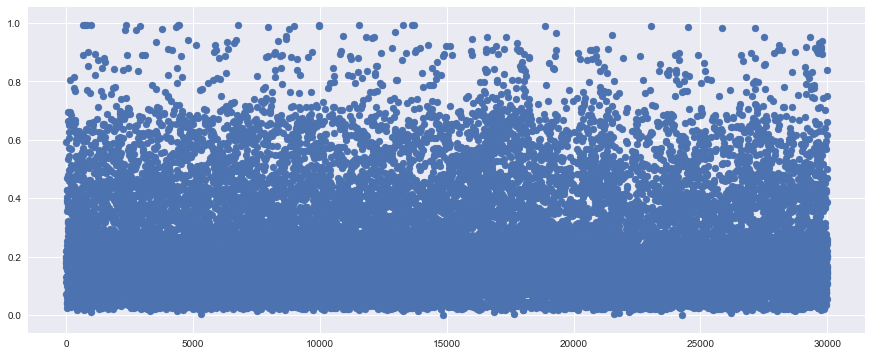

In [10]:
plt.scatter(df['ID'], proba_log_whole_s)

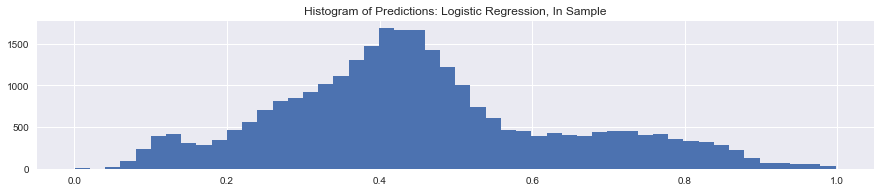

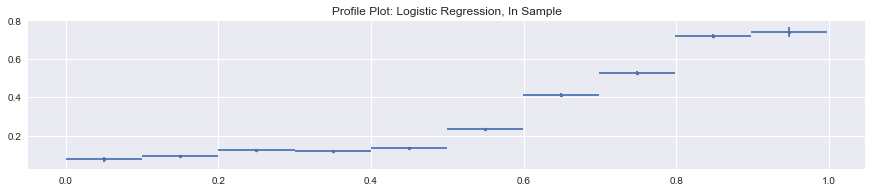

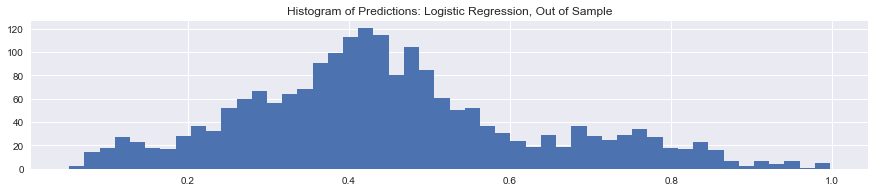

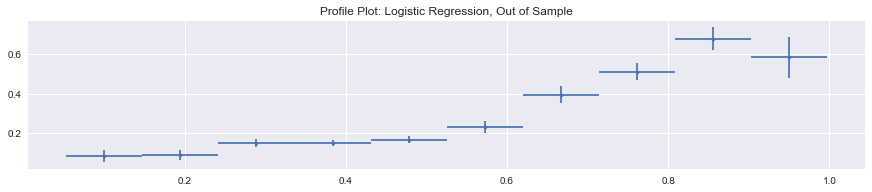

--- 3.038809061050415 seconds ---


In [13]:
import time
start_time = time.time()

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#max_iter = -1 means to get convergence
#To check whether the code works: can try with e.g. max_iter = 5 quicker

#Train our training set
#clf_log_is = LogisticRegression()
#clf_log_is.fit(X_train_scaled, target_train)

clf_log_oos = LogisticRegression(class_weight = 'balanced')
clf_log_oos.fit(X_train_scaled, target_train)

pred_log_is     = clf_log_oos.predict_proba(X_train_scaled)
pred_log_oos    = clf_log_oos.predict_proba(X_test_scaled ) 

# now the visualization...:
proba_log_is  = []
for is_event in pred_log_is:
    proba_log_is.append(is_event[1])

proba_log_oos  = []
for oos_event in pred_log_oos:
    proba_log_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_log_is, bins = 50)
ax1.set_title('Histogram of Predictions: Logistic Regression, In Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_log_is, target_train, 10, min(proba_log_is), max(proba_log_is))
ax2.set_title('Profile Plot: Logistic Regression, In Sample')
plt.show()

ax1 = subplot(211)
hist(proba_log_oos, bins = 50)
ax1.set_title('Histogram of Predictions: Logistic Regression, Out of Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_log_oos, target_test, 10, min(proba_log_oos), max(proba_log_oos))
ax2.set_title('Profile Plot: Logistic Regression, Out of Sample')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [40]:
print (proba_log_is)

[0.48922574721326195, 0.36293134335570421, 0.37332158830436662, 0.66961720542234882, 0.33571209878376262, 0.15860237206140934, 0.48421568664935161, 0.3007885488219183, 0.27291284145229278, 0.67349858542467378, 0.50949785435914419, 0.53446666311697399, 0.78920521075275096, 0.45977423508239179, 0.37040346504048399, 0.21029522583596605, 0.77638939814957297, 0.47555972615694103, 0.44231647064538576, 0.66961269305337556, 0.44511103907699823, 0.35645469031435567, 0.31360923386510314, 0.30975211387447166, 0.39806439888769229, 0.73129587979301391, 0.4106170769091973, 0.32946602261913821, 0.50535611572599981, 0.71102494250440651, 0.26579853441977336, 0.4545943367852382, 0.31211614533401677, 0.56807565707555896, 0.28809576978281393, 0.48417768380178727, 0.40127505399217589, 0.4428513945029216, 0.25709422692179962, 0.42370713238030078, 0.26679330428536435, 0.27780114543481266, 0.61917302042794942, 0.45260498389310788, 0.63344127401722672, 0.82586156022656132, 0.41287702602790344, 0.41782633159488

# ROC and AUC of Logistic Regression

In [14]:
log_roc_auc_whole_s = roc_auc_score(y_true = df['target'], y_score = proba_log_whole_s)
#AR      = metrics.accuracy_score(y_true = target_pred, y_score = proba_1_oos)
print("ROC_auc_Log_Whole Sample = %g" % (log_roc_auc_whole_s))

log_roc_auc_is = roc_auc_score(y_true = target_train, y_score = proba_log_is)
#AR      = metrics.accuracy_score(y_true = target_pred, y_score = proba_1_oos)
print("ROC_auc_Log_In Sample = %g" % (log_roc_auc_is))

log_roc_auc_oos = roc_auc_score(y_true = target_test, y_score = proba_log_oos)
#AR      = metrics.accuracy_score(y_true = target_pred, y_score = proba_1_oos)
print("ROC_auc_Log_OutofSample = %g" % (log_roc_auc_oos))

ROC_auc_Log_Whole Sample = 0.729796
ROC_auc_Log_In Sample = 0.734427
ROC_auc_Log_OutofSample = 0.693657


# Plot the ROC(Receiver Operating Charatertistic) curve 
draw a ROC curve to visualize the performance of a binary classification method. 

Binary classification is the task of classifying the members of a given set of objects into two groups on the basis of whether they have some property or not. There are four possible outcomes from a binary classifier 

<br>
true positive (TP) : predicted to be positive and the actual value is also positive
<br>
false positive (FP) : predicted to be positive but the actual value is negative
<br>
true negative (TN) : predicted to be negative and the actual value is also negative
<br>
false negative (FN) : predicted to be negative but the actual value is positive
<br>
In molecule modeling, the positive entities are commonly called actives, while the negative ones are called decoys.

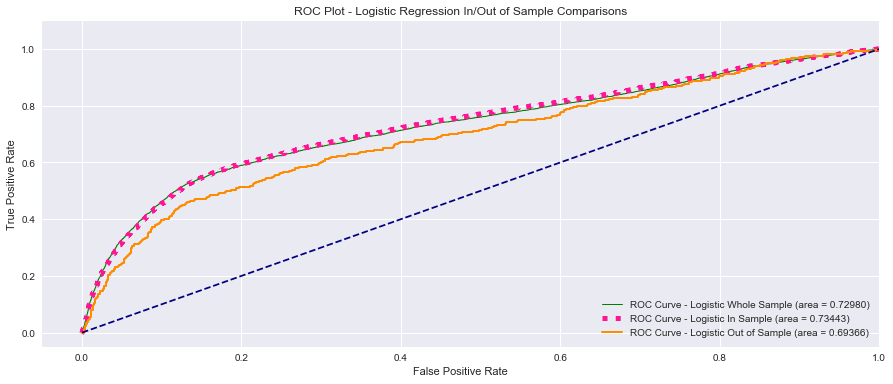

In [15]:
log_false_positive_rate_train, log_true_positive_rate_train, log_thresholds_train = roc_curve(target_train, proba_log_is)
log_roc_auc_train = auc(log_false_positive_rate_train, log_true_positive_rate_train)

log_false_positive_rate_oos, log_true_positive_rate_oos, log_thresholds_oos = roc_curve(target_test, proba_log_oos)
log_roc_auc_oos = auc(log_false_positive_rate_oos, log_true_positive_rate_oos)


log_false_positive_rate_whole_s, log_true_positive_rate_whole_s, log_thresholds = roc_curve(df['target'], proba_log_whole_s)
log_roc_auc_whole_s = auc(log_false_positive_rate_whole_s, log_true_positive_rate_whole_s)

plt.plot(log_false_positive_rate_whole_s, log_true_positive_rate_whole_s, 'g', 
         label='ROC Curve - Logistic Whole Sample (area = {0:0.5f})'
         ''.format(log_roc_auc_whole_s), linewidth = 1)

plt.title('ROC Plot - Logistic Regression In/Out of Sample Comparisons')
plt.plot(log_false_positive_rate_train, log_true_positive_rate_train,
label='ROC Curve - Logistic In Sample (area = {0:0.5f})'
         ''.format(log_roc_auc_train), color = 'deeppink', linestyle =':', linewidth = 5)

plt.plot(log_false_positive_rate_oos, log_true_positive_rate_oos,
label='ROC Curve - Logistic Out of Sample (area = {0:0.5f})'
         ''.format(log_roc_auc_oos), color = 'darkorange', linewidth = 2)
                
         
#label='AUC = %0.2f'% roc_auc, color = 'darkorange')
#plt.plot(false_positive_rate_oos, train_positive_rate_oos, label='AUC = %0.2f'%)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Out of sample error analysis
First find the cross validation accuracy scores

In [16]:
print ("Accuracy score - Logistic whole sample:", clf_logistic_whole_s.score(X_scaled, df['target']))
print ("Accuracy score - Logistic In Sample:", clf_log_oos.score(X_train_scaled, target_train))
print ("Accuracy score - Logistic Out of Sample:", clf_log_oos.score(X_test_scaled, target_test))

print ("-----------------------------------------------------------")
print ("Error - Logistic whole sample:", 1 - clf_logistic_whole_s.score(X_scaled, df['target']))
print ("Error - Logistic In Sample:", 1 - clf_log_oos.score(X_train_scaled, target_train))
print ("Error - Logistic Out of Sample:", 1 - clf_log_oos.score(X_test_scaled, target_test))



Accuracy score - Logistic whole sample: 0.809166666667
Accuracy score - Logistic In Sample: 0.733071428571
Accuracy score - Logistic Out of Sample: 0.7075
-----------------------------------------------------------
Error - Logistic whole sample: 0.190833333333
Error - Logistic In Sample: 0.266928571429
Error - Logistic Out of Sample: 0.2925


In [17]:
from sklearn.model_selection import KFold

CvMetrics_log_whole_s = cross_val_score(clf_logistic_whole_s, X_scaled, df['target'], cv=5)
print ("Cross Validation Matrix - Logistic Whole Sample:" , CvMetrics_log_whole_s)

CvMetrics_log_is = cross_val_score(clf_log_oos, X_train_scaled, target_train, cv=5)
print ("Cross Validation Matrix - Logistic In Sample:" , CvMetrics_log_is)

CvMetrics_log_oos = cross_val_score(clf_log_oos, X_test_scaled, target_test, cv=5)
print ("Cross Validation Matrix - Logistic Out of Sample:" , CvMetrics_log_oos)


Cross Validation Matrix - Logistic Whole Sample: [ 0.80069988  0.80383333  0.80733333  0.81483333  0.81246874]
Cross Validation Matrix - Logistic In Sample: [ 0.71201571  0.71880021  0.72464286  0.75888552  0.74888373]
Cross Validation Matrix - Logistic Out of Sample: [ 0.67581047  0.695       0.69        0.6725      0.72180451]


# Mean Square Error

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

MSE_log_whole_s = mean_squared_error(y_true = df['target'], y_pred = proba_log_whole_s)
print ("MSE - Logistic Whole Sample", MSE_log_whole_s)

MSE_log_is = mean_squared_error(y_true = df['target'], y_pred = proba_log_whole_s)
print ("MSE - Logistic Whole Sample ", MSE_log_is)

MSE_log_oos = mean_squared_error(y_true = df['target'], y_pred = proba_log_whole_s)
print ("MSE - Logistic Out of Sample", MSE_log_oos)


MSE - Logistic Whole Sample 0.143535841746
MSE - Logistic Whole Sample  0.143535841746
MSE - Logistic Out of Sample 0.143535841746


# R-squared of Logistic Regression
Compute the $R^2$: coefficient of determination regression score function
<br>
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

In [18]:
from sklearn import metrics

print ("R-squared of Logistic Regression:")
accuracy_log_whole_s = metrics.r2_score(df['target'], proba_log_whole_s)
print ("Whole Sample", accuracy_log_whole_s)

accuracy_log_is = metrics.r2_score(target_train, proba_log_is)
print ("In Sample", accuracy_log_is)

accuracy_log_oos = metrics.r2_score(target_test, proba_log_oos)
print ("Out of sample:", accuracy_log_oos)


R-squared of Logistic Regression:
Whole Sample 0.166799935251
In Sample -0.170370167302
Out of sample: -0.237621595905


-------------------------------------------------------------------------

# Optimisation of the logistic regression using grid research

First train the whole sample

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   47.6s finished


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


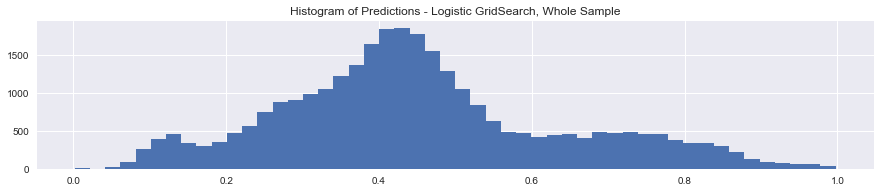

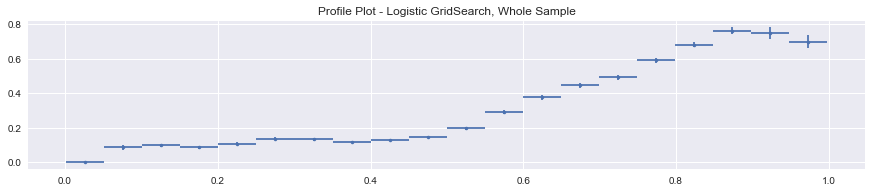

ROC_auc = 0.73164
--- 50.42654800415039 seconds ---


In [19]:
import time
start_time = time.time()
from sklearn.linear_model import LogisticRegression

clf_log_whole_s_GridSearch = LogisticRegression(class_weight = 'balanced')
clf_log_whole_s_GridSearch.fit(X_scaled, df['target'])

param_grid_log_whole_s = dict(C = [0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0])
grid_search_log_whole_s = GridSearchCV(clf_log_whole_s_GridSearch, param_grid = param_grid_log_whole_s, verbose = 1, n_jobs = 1, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search_log_whole_s.fit(X_train_scaled, target_train)
print(grid_search_log_whole_s.best_estimator_)

clf_log_GridSearch = grid_search_log_whole_s.best_estimator_

log__whole_s_GridSearch     = clf_log_whole_s_GridSearch.predict_proba(X_scaled)
 

# now the visualization...:
proba_log_whole_s_GridSearch  = []
for is_event in log__whole_s_GridSearch :
    proba_log_whole_s_GridSearch.append(is_event[1])

    
ax1 = subplot(211)
hist(proba_log_whole_s_GridSearch, bins = 50)
ax1.set_title('Histogram of Predictions - Logistic GridSearch, Whole Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_log_whole_s_GridSearch, df['target'], 20, min(proba_log_whole_s_GridSearch), max(proba_log_whole_s_GridSearch))
ax2.set_title('Profile Plot - Logistic GridSearch, Whole Sample')
plt.show()


roc_auc = roc_auc_score(y_true = df['target'], y_score = proba_log_whole_s_GridSearch)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g" % (roc_auc))

print("--- %s seconds ---" % (time.time() - start_time))

Now train 25000 (training set) and test 5000

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   49.1s finished


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


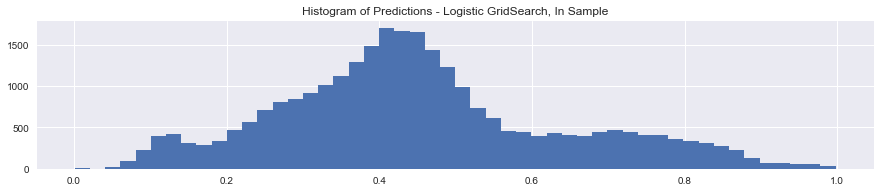

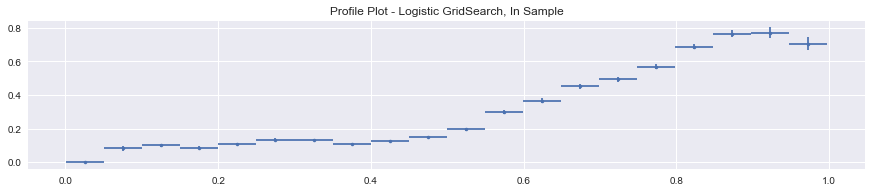

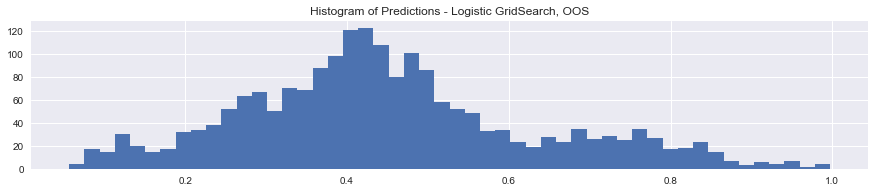

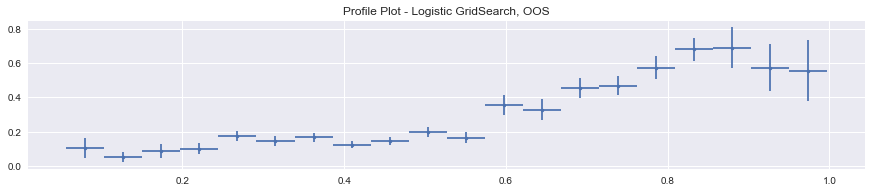

ROC_auc = 0.693754


In [20]:
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array') # this is a known issue related to joblib

clf_log_GridSearch = LogisticRegression(class_weight = 'balanced')

param_grid_log      = dict(C = [0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0])
grid_search_log     = GridSearchCV(clf_log_GridSearch, param_grid = param_grid_log, verbose = 1, n_jobs = 1, scoring = 'roc_auc') # We optimize for ROC area under curve

#Only train the training set
grid_search_log.fit(X_train_scaled, target_train)
print(grid_search_log.best_estimator_)

clf_log_GridSearch = grid_search_log.best_estimator_

test_log_is_GridSearch     = clf_log_GridSearch.predict_proba(X_train_scaled)
test_log_oos_GridSearch    = clf_log_GridSearch.predict_proba(X_test_scaled ) 

# now the visualization...:
proba_log_is_GridSearch  = []
for is_event in test_log_is_GridSearch:
    proba_log_is_GridSearch.append(is_event[1])

proba_log_oos_GridSearch  = []
for oos_event in test_log_oos_GridSearch:
    proba_log_oos_GridSearch.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_log_is_GridSearch, bins = 50)
ax1.set_title('Histogram of Predictions - Logistic GridSearch, In Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_log_is_GridSearch, target_train, 20, min(proba_log_is_GridSearch), max(proba_log_is_GridSearch))
ax2.set_title('Profile Plot - Logistic GridSearch, In Sample')
plt.show()
# I don't understand that IS profile plot!!!!! ######

ax1 = subplot(211)
hist(proba_log_oos_GridSearch, bins = 50)
ax1.set_title('Histogram of Predictions - Logistic GridSearch, OOS')
plt.show()
ax2 = subplot(212)
Profile(proba_log_oos_GridSearch, target_test, 20, min(proba_log_oos_GridSearch), max(proba_log_oos_GridSearch))
ax2.set_title('Profile Plot - Logistic GridSearch, OOS')
plt.show()

roc_auc = roc_auc_score(y_true = target_test, y_score = proba_log_oos_GridSearch)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g" % (roc_auc))

# ROC and AUC of Logistic Regression - GridSearch

In [28]:
log_roc_auc_whole_s_GS = roc_auc_score(y_true = df['target'], y_score = proba_log_whole_s_GridSearch)
print("ROC_auc_LogGrid_Whole Sample = %g" % (log_roc_auc_whole_s_GS))
print("WS auc improved", log_roc_auc_whole_s_GS - log_roc_auc_whole_s)
print("----------------------------------------------------------------------------------")

log_roc_auc_is_GS = roc_auc_score(y_true = target_train, y_score = proba_log_is_GridSearch)
#AR      = metrics.accuracy_score(y_true = target_pred, y_score = proba_1_oos)
print("ROC_auc_LogGrid_In Sample = %g" % (log_roc_auc_is_GS))
print("IS auc improved", log_roc_auc_is_GS - log_roc_auc_is)
print("----------------------------------------------------------------------------------")

log_roc_auc_oos_GS = roc_auc_score(y_true = target_test, y_score = proba_log_oos_GridSearch)
#AR      = metrics.accuracy_score(y_true = target_pred, y_score = proba_1_oos)
print("ROC_auc_LogGrid_OutofSample = %g" % (log_roc_auc_oos_GS))
print("OOS auc improved", log_roc_auc_oos_GS - log_roc_auc_oos)


ROC_auc_LogGrid_Whole Sample = 0.73164
WS auc improved 0.00184429526309
----------------------------------------------------------------------------------
ROC_auc_LogGrid_In Sample = 0.734367
IS auc improved -5.98559687275e-05
----------------------------------------------------------------------------------
ROC_auc_LogGrid_OutofSample = 0.693754
OOS auc improved 9.71096632942e-05


ROC auc improved a little bit after optimisation

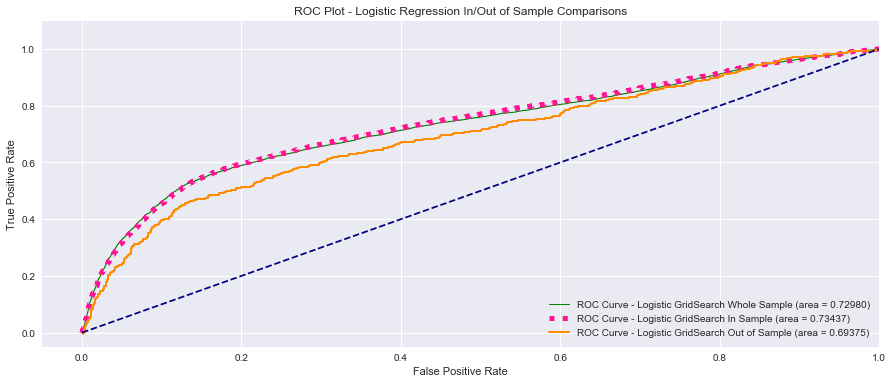

In [36]:
logGrid_fpr_whole, logGrid_tpr_whole, logGrid_thresholds_whole = roc_curve(df['target'], proba_log_whole_s)
logGrid_roc_auc_whole = auc(logGrid_fpr_whole, logGrid_tpr_whole)

logGrid_fpr_train, logGrid_tpr_train, logGrid_thresholds_train = roc_curve(target_train, proba_log_is_GridSearch)
logGrid_roc_auc_train = auc(logGrid_fpr_train, logGrid_tpr_train)

logGrid_fpr_oos, logGrid_tpr_oos, logGrid_thresholds_oos = roc_curve(target_test, proba_log_oos_GridSearch)
log_roc_auc_oos = auc(logGrid_fpr_oos, logGrid_tpr_oos)


plt.plot(logGrid_fpr_whole, logGrid_tpr_whole, 'g', 
         label='ROC Curve - Logistic GridSearch Whole Sample (area = {0:0.5f})'
         ''.format(logGrid_roc_auc_whole), linewidth = 1)

plt.title('ROC Plot - Logistic Regression In/Out of Sample Comparisons')
plt.plot(logGrid_fpr_train, logGrid_tpr_train,
label='ROC Curve - Logistic GridSearch In Sample (area = {0:0.5f})'
         ''.format(logGrid_roc_auc_train), color = 'deeppink', linestyle =':', linewidth = 5)

plt.plot(logGrid_fpr_oos, logGrid_tpr_oos,
label='ROC Curve - Logistic GridSearch Out of Sample (area = {0:0.5f})'
         ''.format(log_roc_auc_oos), color = 'darkorange', linewidth = 2)


         
#label='AUC = %0.2f'% roc_auc, color = 'darkorange')
#plt.plot(false_positive_rate_oos, train_positive_rate_oos, label='AUC = %0.2f'%)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Cross Validation

In [38]:
print ("Accuracy score - Logistic Grid whole sample:", clf_log_whole_s_GridSearch.score(X_scaled, df['target']))
print ("Accuracy score - Logistic Grid In Sample:", clf_log_GridSearch.score(X_train_scaled, target_train))
print ("Accuracy score - Logistic Grid Out of Sample:", clf_log_GridSearch.score(X_test_scaled, target_test))

print ("-----------------------------------------------------------")
print ("Error - Logistic Grid whole sample:", 1 - clf_log_whole_s_GridSearch.score(X_scaled, df['target']))
print ("Error - Logistic Grid In Sample:", 1 - clf_log_GridSearch.score(X_train_scaled, target_train))
print ("Error - Logistic Grid Out of Sample:", 1 - clf_log_GridSearch.score(X_test_scaled, target_test))


Accuracy score - Logistic Grid whole sample: 0.7326
Accuracy score - Logistic Grid In Sample: 0.7335
Accuracy score - Logistic Grid Out of Sample: 0.707
-----------------------------------------------------------
Error - Logistic Grid whole sample: 0.2674
Error - Logistic Grid In Sample: 0.2665
Error - Logistic Grid Out of Sample: 0.293


In [39]:
print ("R-squared of Logistic Regression:")
accuracy_log_whole_s_GS = metrics.r2_score(df['target'], proba_log_whole_s_GridSearch)
print ("Whole Sample", accuracy_log_whole_s_GS)

accuracy_log_is_GS = metrics.r2_score(target_train, proba_log_is_GridSearch)
print ("In Sample", accuracy_log_is_GS)

accuracy_log_oos_GS = metrics.r2_score(target_test, proba_log_oos_GridSearch)
print ("Out of sample:", accuracy_log_oos_GS)

R-squared of Logistic Regression:
Whole Sample -0.176280927646
In Sample -0.170614812138
Out of sample: -0.237576560566


# TO DO:

# Analyse the effect of leaving out unimportant inputs
e.g. SEX, MARRIAGE, AGE

# Analyse the effect of leaving out important inputs

e.g. leave out the pay/limit


# Add noise to some inputs: e.g. select a proportion of data and change into rand num, then start training

-------------------------------------------------------------------------------------------------

# SVM

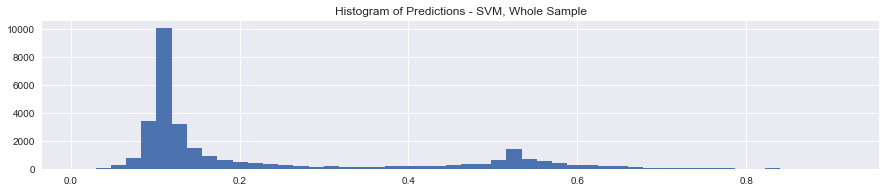

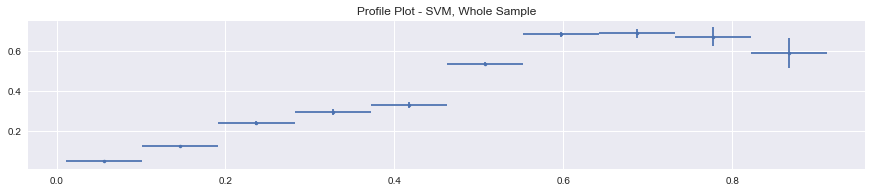

--- 709.5219280719757 seconds ---


In [46]:
import time
start_time = time.time()

# Here the SVM-SVC Code starts. We do NOT include GridSearchCV YET
from sklearn import svm

clf_SVM = svm.SVC(kernel = 'rbf', max_iter = -1, probability = True,class_weight = 'balanced', 
              shrinking = True, cache_size = 4000) # Cache size 4 GB
clf_SVM.fit(X_scaled, df['target'])

pred_SVM_whole_s = clf_SVM.predict_proba(X_scaled)

proba_SVM_whole_s  = []
for is_event in pred_SVM_whole_s:
        proba_SVM_whole_s.append(is_event[1])

ax1 = subplot(211)
plt.hist(proba_SVM_whole_s, bins = 50)
ax1.set_title('Histogram of Predictions - SVM, Whole Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_SVM_whole_s, df['target'].values, 10, min(proba_SVM_whole_s), max(proba_SVM_whole_s))
ax2.set_title('Profile Plot - SVM, Whole Sample')
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

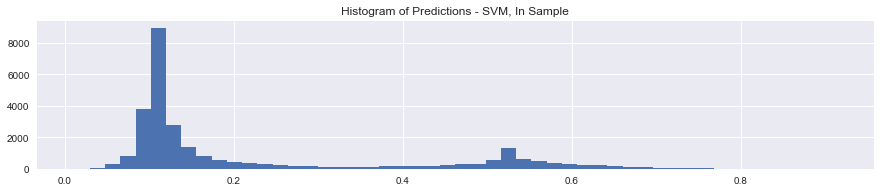

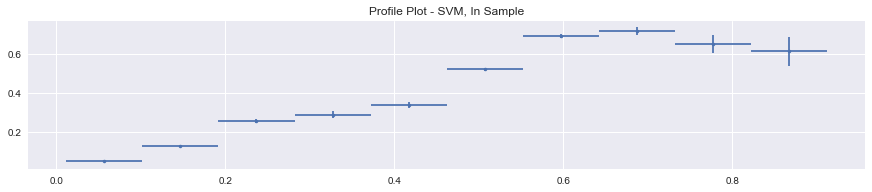

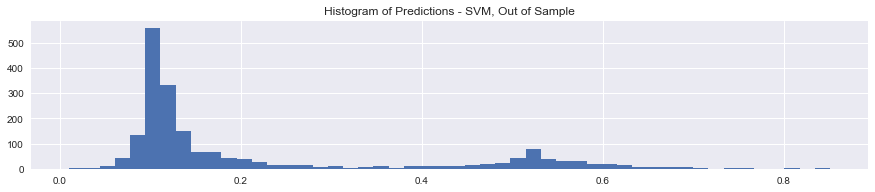

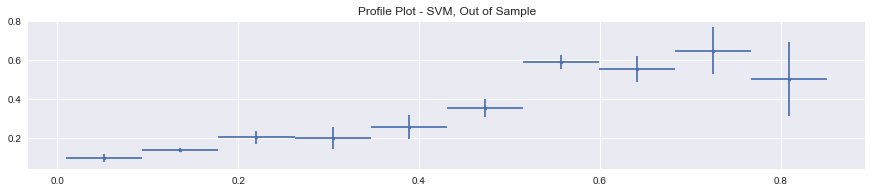

--- 613.7386448383331 seconds ---


In [49]:
import time
start_time = time.time()

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#max_iter = -1 means to get convergence
#To check whether the code works: can try with e.g. max_iter = 5 quicker

#Train our training set
clf_SVM_oos= svm.SVC(kernel = 'rbf', max_iter = -1, probability = True, class_weight = 'balanced', shrinking = True, cache_size = 4000, C = 1.0)
clf_SVM_oos.fit(X_train_scaled, target_train)

pred_SVM_is     = clf_SVM_oos.predict_proba(X_train_scaled)
pred_SVM_oos    = clf_SVM_oos.predict_proba(X_test_scaled ) 

# now the visualization...:
proba_SVM_is  = []
for is_event in pred_SVM_is:
    proba_SVM_is.append(is_event[1])

proba_SVM_oos  = []
for oos_event in pred_SVM_oos:
    proba_SVM_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_SVM_is, bins = 50)
ax1.set_title('Histogram of Predictions - SVM, In Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_SVM_is, target_train, 10, min(proba_SVM_is), max(proba_SVM_is))
ax2.set_title('Profile Plot - SVM, In Sample')
plt.show()

ax1 = subplot(211)
hist(proba_SVM_oos, bins = 50)
ax1.set_title('Histogram of Predictions - SVM, Out of Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_SVM_oos, target_test, 10, min(proba_SVM_oos), max(proba_SVM_oos))
ax2.set_title('Profile Plot - SVM, Out of Sample')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

# ROC AUC of SVM

In [50]:
roc_auc_SVM = roc_auc_score(y_true = df['target'], y_score = proba_SVM_whole_s, 
                        average='macro', sample_weight=None)
print("SVM In Sample ROC_auc = %g" % roc_auc_SVM) 

roc_auc_is_SVM = roc_auc_score(y_true = target_train, y_score = proba_SVM_is)
print("ROC_auc_SVM_In Sample = %g" % (roc_auc_is_SVM))

roc_auc_oos_SVM = roc_auc_score(y_true = target_test, y_score = proba_SVM_oos)
print("ROC_auc_SVM_OutofSample = %g" % (roc_auc_oos_SVM))


SVM In Sample ROC_auc = 0.795057
ROC_auc_SVM_In Sample = 0.798101
ROC_auc_SVM_OutofSample = 0.722976


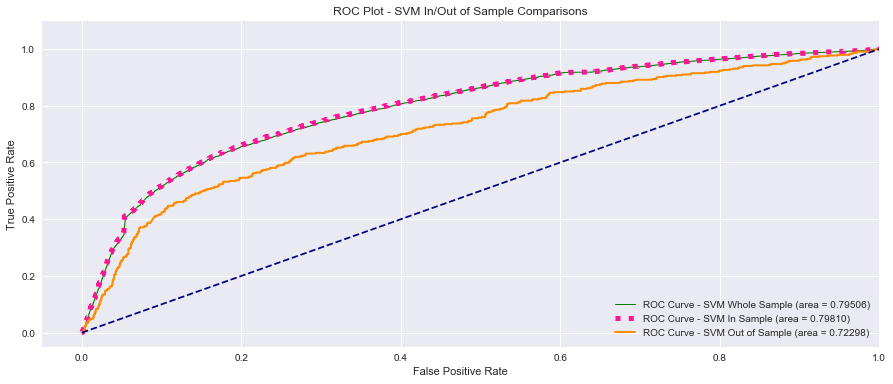

In [59]:
SVM_fpr_whole, SVM_tpr_whole, SVM_thresholds_whole = roc_curve(df['target'], proba_SVM_whole_s)
SVM_roc_auc_whole = auc(SVM_fpr_whole, SVM_tpr_whole)

SVM_fpr_is, SVM_tpr_is, SVM_thresholds_is = roc_curve(target_train, proba_SVM_is)
SVM_roc_auc_is = auc(SVM_fpr_is, SVM_tpr_is)

SVM_fpr_oos, SVM_tpr_oos, SVM_thresholds_oos = roc_curve(target_test, proba_SVM_oos)
SVM_roc_auc_oos = auc(SVM_fpr_oos, SVM_tpr_oos)


plt.plot(SVM_fpr_whole, SVM_tpr_whole, 'g', 
         label='ROC Curve - SVM Whole Sample (area = {0:0.5f})'
         ''.format(SVM_roc_auc_whole), linewidth = 1)

plt.title('ROC Plot - SVM In/Out of Sample Comparisons')
plt.plot(SVM_fpr_train, SVM_tpr_train,
label='ROC Curve - SVM In Sample (area = {0:0.5f})'
         ''.format(SVM_roc_auc_is), color = 'deeppink', linestyle =':', linewidth = 5)

plt.plot(SVM_fpr_oos, SVM_tpr_oos,
label='ROC Curve - SVM Out of Sample (area = {0:0.5f})'
         ''.format(SVM_roc_auc_oos), color = 'darkorange', linewidth = 2)


#label='AUC = %0.2f'% roc_auc, color = 'darkorange')
#plt.plot(false_positive_rate_oos, train_positive_rate_oos, label='AUC = %0.2f'%)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Computing Cross validation Metrics. 
When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. 
<br>
https://medium.com/towards-data-science/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [58]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score

clf_SVM = svm.SVC(kernel = 'rbf', max_iter = -1, probability = True, 
                  class_weight = 'balanced', shrinking = True, cache_size = 4000) 

AR_scores_SVM = cross_val_score(clf_SVM, df['target'], proba_SVM_whole_s, cv=5)
print (AR_scores_SVM)

print ("The mean score and the 95% confidence interval of the score estimate:")
print("Accuracy_SVM: %0.4f (+/- %0.4f)" % (AR_scores_SVM.mean(), AR_scores_SVM.std() * 2))




//anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 24000]

--------------------------------------------------------------------------

SVM - in sample 25000

--------------------------------------------------------------------------

----------------------------------------------------------------------------------------------

In [ ]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array')

param_grid      = dict(C=[0.1, 0.5, 1., 2.0, 4.0])
clf             = svm.SVC(kernel = 'rbf', max_iter = -1, probability = True, class_weight = 'balanced', shrinking = True, cache_size = 1000)
grid_search     = GridSearchCV(clf, param_grid = param_grid, verbose = 1, n_jobs = 6, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)

clf = grid_search.best_estimator_

pred_is_SVMGrid     = clf.predict_proba(X_train_scaled)
pred_oos_SVMGrid    = clf.predict_proba(X_test_scaled) 

# now the visualization...:
proba_1_is_SVMGrid  = []
for is_event in pred_is_SVMGrid:
    proba_1_is_SVMGrid.append(is_event[1])

proba_1_oos_SVMGrid  = []
for oos_event in pred_oos_SVMGrid:
    proba_1_oos_SVMGrid.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is_SVMGrid, bins = 50)
ax1.set_title('Histogram of Predictions - SVM, ')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is_SVMGrid, target_train, 10, min(proba_1_is_SVMGrid), max(proba_1_is_SVMGrid))
ax2.set_title('Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos_SVMGrid, bins = 50)
ax1.set_title('Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos_SVMGrid, target_test, 10, min(proba_1_oos_SVMGrid), max(proba_1_oos_SVMGrid))
ax2.set_title('Profile Plot')
plt.show()

roc_auc_SVMGrid = roc_auc_score(y_true = target_test, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc_SVMGrid = %g" % (roc_auc))

In [ ]:
false_positive_rate_whole, true_positive_rate_whole, thresholds_whole= roc_curve(df['target'], proba_1_whole_s)
roc_auc_whole = auc(false_positive_rate_whole, true_positive_rate_whole)

false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(target_train, proba_1_is)
roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)

false_positive_rate_oos, true_positive_rate_oos, thresholds_oos = roc_curve(target_test, proba_1_oos)
roc_auc_oos = auc(false_positive_rate_oos, true_positive_rate_oos)

false_positive_rate_oos_SVMGrid, true_positive_rate_oos_SVMGrid, thresholds_oos_SVMGrid = roc_curve(target_test, proba_1_oos_SVMGrid)
roc_auc_oos_SVMGrid = auc(false_positive_rate_oos_SVMGrid, true_positive_rate_oos_SVMGrid)


plt.title('ROC Plot - SVM with GridSearch')

plt.plot(false_positive_rate_whole_s, true_positive_rate_whole_s, 'blue', 
         label='ROC Curve - SVM Whole Sample (area = {0:0.5f})'
         ''.format(roc_auc_whole_s), linewidth = 1) 
plt.plot(false_positive_rate_train, true_positive_rate_train,
label='ROC Curve - SVM In Sample (area = {0:0.5f})'
         ''.format(roc_auc_train), color = 'deeppink', linestyle =':', linewidth = 5.5)

plt.plot(false_positive_rate_oos, true_positive_rate_oos,
label='ROC Curve - SVM Out of Sample (area = {0:0.5f})'
         ''.format(roc_auc_oos), color = 'darkorange', linewidth = 2)

plt.plot(false_positive_rate_oos_SVMGrid, true_positive_rate_oos_SVMGrid,
label='ROC Curve - SVM Grid Out of Sample (area = {0:0.5f})'
         ''.format(roc_auc_oos_SVMGrid), linestyle = ':', color = 'green', linewidth = 5.5)

         
#label='AUC = %0.2f'% roc_auc, color = 'darkorange')
#plt.plot(false_positive_rate_oos, train_positive_rate_oos, label='AUC = %0.2f'%)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([-0.02,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Compute Cross Validation for SVM Grid Search, accuracy score

In [ ]:
grid_search.fit(X_train_scaled, target_train).score(X_train_scaled, target_train)

In [ ]:
clf.score(target_train, )

In [ ]:
df.head(5)

In [ ]:
print (X_scaled)

In [ ]:
print (len(target_test))
print (len(proba_1_oos_SVMGrid))

In [ ]:
target_test.shape[0]
target_test.shape[1]  target test is only one dimen

In [ ]:
print (target_test)

In [ ]:
clf.score(target_test, proba_1_oos_SVMGrid)

In [ ]:
print ("SVM GridSearch Accuracy Score: ", clf.score(X_test, proba_1_oos_SVMGrid))

In [ ]:
cross_val_score(clf, target_test, proba_1_oos_SVMGrid, cv=5, n_jobs=-1)

Compute the $R^2$: coefficient of determination regression score function
<br>
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

In [ ]:
from sklearn import metrics

#AR_SVMGrid = cross_val_score(clf, target_test, proba_1_oos_SVMGrid)

accuracy_SVM_is = metrics.r2_score(target_train, proba_1_is)
print ("SVM In Sample Cross-Predicted Accuracy:", accuracy_SVM_is)

accuracy_SVM_oos = metrics.r2_score(target_test, proba_1_oos)
print ("SVM Out of Sample Cross-Predicted Accuracy:", accuracy_SVM_oos)

accuracy_SVMGrid_oos = metrics.r2_score(target_test, proba_1_oos_SVMGrid)
print ("SVM GridSearch Out of Sample Cross-Predicted Accuracy:", accuracy_SVMGrid_os)


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics.roc_auc_score
from scipy import interp


--------------------------------------------------------------------------

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics        import roc_auc_score

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter = 500, 
                   hidden_layer_sizes=(25, 2), random_state=1)

NN.fit(X_scaled, df['target'])

proba_NN_whole_s  = []
for is_event in pred_NN_whole_s:
    proba_NN_whole_s.append(is_event[1])

ax1 = subplot(211)
plt.hist(proba_NN_whole_s, bins = 50)
ax1.set_title('Histogram of Predictions - SVM, Whole Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_NN_whole_s, df['target'].values, 10, min(proba_NN_whole_s), max(proba_NN_whole_s))
ax2.set_title('Profile Plot - SVM, Whole Sample')
plt.show()


In [ ]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter = 500, hidden_layer_sizes=(25, 2), random_state=1)

NN_ios.fit(X_train_scaled, target_train)

pred_NN_is     = NN_ios.predict_proba(X_train_scaled)
pred_NN_oos    = NN_ios.predict_proba(X_test_scaled ) 

# now the visualization...:
proba_NN_is  = []
for is_event in pred_is:
    proba_NN_is.append(is_event[1])

proba_NN_oos  = []
for oos_event in pred_oos:
    proba_NN_oos.append(oos_event[1])
    
ax1 = subplot(211)
hist(proba_NN_is, bins = 50)
ax1.set_title('Histogram of Predictions - Neural Network In Sample')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_NN_is, target_train, 20, min(proba_NN_is), max(proba_NN_is))
ax2.set_title('Profile Plot - Neural Network In Sample')
plt.show()

ax1 = subplot(211)
hist(proba_NN_oos, bins = 50)
ax1.set_title('Histogram of Predictions - Neural Network Out of Sample')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_NN_oos, target_test, 20, min(proba_NN_oos), max(proba_NN_oos))
ax2.set_title('Profile Plot - Neural Network Out of Sample')
plt.show()

roc_auc = roc_auc_score(y_true = target_test, y_score = proba_NN_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))
    

--------------------------------------------------------------------------

# Random forests:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

rft = RandomForestClassifier(n_estimators = 1600, n_jobs = -1, class_weight = "balanced_subsample", max_depth = 8)
rft.fit(X_scaled, df['target'])

pred_rft_whole_s     = rfc.predict_proba(X_scaled)

# now the visualization...:
proba_rft_whole_s  = []
for is_event in pred_rft_whole_s:
    proba_rft_whole_s.append(is_event[1])
       
ax1 = subplot(211)
hist(proba_rft_whole_s, bins = 50)
ax1.set_title('Histogram of Predictions - Random Forest, Whole Sample')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_rft_whole_s, target_train, 10, min(proba_rft_whole_s), max(proba_rft_whole_s))
ax2.set_title('Profile Plot, Random Forest, Whole Sample')
plt.show()

roc_auc = roc_auc_score(y_true = df['target'], y_score = proba_rft_whole_s)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("Neural Network ROC_auc = %g, AR = ?" % (roc_auc))

In [ ]:


rft = RandomForestClassifier(n_estimators = 1600, n_jobs = -1, class_weight = "balanced_subsample", max_depth = 8)
rft.fit(X_train_scaled, target_train)

pred_rft_is     = rfc.predict_proba(X_train_scaled)
pred_rft_oos    = rfc.predict_proba(X_test_scaled ) 

# now the visualization...:
proba_rft_is  = []
for is_event in pred_rft_is:
    proba_rft_is.append(is_event[1])

proba_rft_oos  = []
for oos_event in pred_rft_oos:
    proba_rft_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_rft_is, bins = 50)
ax1.set_title('Histogram of Predictions - Random Forest, In Sample')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_rft_is, target_train, 10, min(proba_rft_is), max(proba_rft_is))
ax2.set_title('Profile Plot - Random Forest, In Sample')
plt.show()

ax1 = subplot(211)
hist(proba_rft_oos, bins = 50)
ax1.set_title('Histogram of Predictions - Random Forest, Out of Sample')
plt.show()
ax2 = subplot(212)
Profile(proba_rft_oos, target_train, 10, min(proba_rft_oos), max(proba_rft_oos))
ax2.set_title('Profile Plot - Random Forest, Out of Sample')
plt.show()

In [ ]:
rft_roc_auc_whole_s = roc_auc_score(y_true = df['target'], y_score = proba_log_whole_s_GridSearch)
print("ROC_auc_LogGrid_Whole Sample = %g" % (rft_roc_auc_whole_s))
print("WS auc improved", log_roc_auc_whole_s_GS - log_roc_auc_whole_s)
print("----------------------------------------------------------------------------------")

rft_roc_auc_is = roc_auc_score(y_true = target_train, y_score = proba_log_is_GridSearch)

print("ROC_auc_LogGrid_In Sample = %g" % (rft_roc_auc_is))
print("IS auc improved", log_roc_auc_is_GS - log_roc_auc_is)
print("----------------------------------------------------------------------------------")

rft_roc_auc_oos = roc_auc_score(y_true = target_test, y_score = proba_log_oos_GridSearch)
print("ROC_auc_LogGrid_OutofSample = %g" % (log_roc_auc_oos_GS))
print("OOS auc improved", log_roc_auc_oos_GS - log_roc_auc_oos)

In [ ]:
from sklearn.ensemble    import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

param_grid      = dict(n_estimators=[100, 200, 400, 800, 1600], max_depth=[3, 4, 5, 6, 7, 8, 9])
rfc             = RandomForestClassifier(n_jobs = -1, class_weight = "balanced_subsample")
grid_search     = GridSearchCV(rfc, param_grid = param_grid, verbose = 1, n_jobs = 1, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)

rfc             = grid_search.best_estimator_

pred_svc_is     = rfc.predict_proba(X_train_scaled)
pred_svc_oos    = rfc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_svc_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is_rft, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos_rft, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos_rft, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

--------------------------------------------------------------------------

# Grading Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 400, max_depth = 5, learning_rate = 0.01, )

gbc.fit(X_train_scaled, target_train)

pred_is     = gbc.predict_proba(X_train_scaled)
pred_oos    = gbc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

Scikit-Learn Neural Network:

That looks pretty good as well. Now again - let's optimize the parameters for the Neural Network:

In [ ]:
### Classifier Neural Network optimization
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array') # this is a known issue related to joblib

gbc             = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)

param_grid      = dict(max_iter = [50, 100, 170, 250, 500, 1000], hidden_layer_sizes = [(7,3), (10, 2), (14,2), (25, 2), (50, 2)], alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 10, 1000])
grid_search     = GridSearchCV(gbc, param_grid = param_grid, verbose = 1, n_jobs = 8, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)
gbc             = grid_search.best_estimator_

pred_svc_is     = gbc.predict_proba(X_train_scaled)
pred_svc_oos    = gbc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_svc_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array') # this is a known issue related to joblib

gbc             = GradientBoostingClassifier()

param_grid      = dict(learning_rate = [0.005, 0.01, 0.02, 0.05, 0.1], n_estimators = [50, 100, 200, 400, 1000], max_depth = [3, 4, 5, 6, 7])
grid_search     = GridSearchCV(gbc, param_grid = param_grid, verbose = 1, n_jobs = 8, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)
gbc             = grid_search.best_estimator_

pred_svc_is     = gbc.predict_proba(X_train_scaled)
pred_svc_oos    = gbc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_svc_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

# ROC AUC for Random Forest

--------------------------------------------------------------------------

**TODO**

deep learning

neural network

Dieser berühmte ROC Plot

slides -> slides Kazim